# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import zipfile
import os

Arquivos no diretório '/content': ['.config', 'X_train_selected.csv', '__MACOSX', 'X_test_selected.csv', 'UCI HAR Dataset', 'UCI HAR Dataset.zip', 'sample_data']
Primeiras linhas de 'features.txt':
    index            feature
0      1  tBodyAcc-mean()-X
1      2  tBodyAcc-mean()-Y
2      3  tBodyAcc-mean()-Z
3      4   tBodyAcc-std()-X
4      5   tBodyAcc-std()-Y
Lista de features únicas (amostra):
 ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z', '0_tBodyAcc-std()-X', '0_tBodyAcc-std()-Y']
Amostra de 'subject_train':
    subject
0        1
1        1
2        1
3        1
4        1
Amostra de 'X_train':
    0_tBodyAcc-mean()-X  0_tBodyAcc-mean()-Y  0_tBodyAcc-mean()-Z  \
0             0.288585            -0.020294            -0.132905   
1             0.278419            -0.016411            -0.123520   
2             0.279653            -0.019467            -0.113462   
3             0.279174            -0.026201            -0.123283   
4             0.276629  

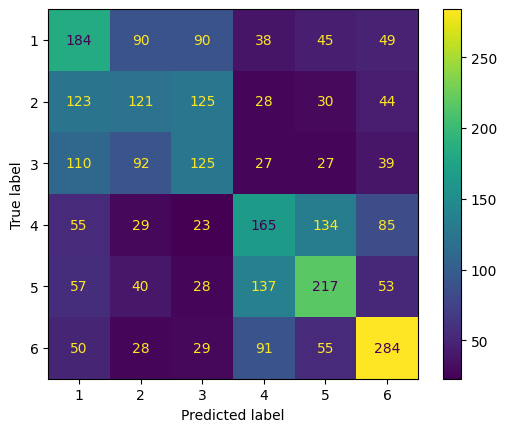

In [10]:

# 1. Definindo o caminho do arquivo ZIP
zip_path = '/content/UCI HAR Dataset.zip'

# 2. Extraindo o conteúdo do ZIP para o diretório /content
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# 3. Verificando se a pasta foi extraída corretamente
print("Arquivos no diretório '/content':", os.listdir('/content'))

# 4. Definindo o caminho base para os arquivos extraídos
path = '/content/UCI HAR Dataset/'

# 5. Carregando as features (nomes das colunas)
features = pd.read_csv(path + 'features.txt', sep='\s+', header=None, names=['index', 'feature'])
print("Primeiras linhas de 'features.txt':\n", features.head())

# Tratando nomes duplicados nas features
features['feature'] = features.groupby('feature').cumcount().astype(str) + '_' + features['feature']
feature_names = features['feature'].tolist()
print("Lista de features únicas (amostra):\n", feature_names[:5])

# 6. Carregando os identificadores dos indivíduos
subject_train = pd.read_csv(path + 'train/subject_train.txt', header=None, names=['subject'])
subject_test = pd.read_csv(path + 'test/subject_test.txt', header=None, names=['subject'])
print("Amostra de 'subject_train':\n", subject_train.head())

# 7. Carregando as variáveis explicativas (X_train e X_test)
X_train = pd.read_csv(path + 'train/X_train.txt', sep='\s+', header=None, names=feature_names)
X_test = pd.read_csv(path + 'test/X_test.txt', sep='\s+', header=None, names=feature_names)
print("Amostra de 'X_train':\n", X_train.iloc[:5, :5])

# 8. Carregando as atividades (y_train e y_test)
y_train = pd.read_csv(path + 'train/y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv(path + 'test/y_test.txt', header=None, names=['activity'])
print("Amostra de 'y_train':\n", y_train.head())

# 9. Adicionando o identificador do indivíduo
X_train['subject'] = subject_train
X_test['subject'] = subject_test

# 10. Definindo o índice duplo (ordem + identificador do sujeito)
X_train.set_index([X_train.index, 'subject'], inplace=True)
X_test.set_index([X_test.index, 'subject'], inplace=True)

# 11. Selecionando três colunas específicas para o exercício
selected_features = ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
print("Amostra de 'X_train_selected':\n", X_train_selected.head())

# 12. Salvando as bases selecionadas em CSV
X_train_selected.to_csv('/content/X_train_selected.csv', index=True)
X_test_selected.to_csv('/content/X_test_selected.csv', index=True)

print("Bases carregadas e salvas com sucesso!")

# 13. Exemplo de criação da matriz de confusão com ConfusionMatrixDisplay
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)

# Previsão
y_pred = clf.predict(X_test_selected)

# Exibindo a matriz de confusão
print("Matriz de confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

Dimensões das bases:
X_train_final: (5514, 3), y_train_final: (5514, 1)
X_val: (1838, 3), y_val: (1838, 1)

Amostra de X_train_final:
               0_tBodyAcc-mean()-X  0_tBodyAcc-mean()-Y  0_tBodyAcc-mean()-Z
     subject                                                               
6593 28                  0.217295            -0.028434            -0.035783
3519 17                  0.294986            -0.009296            -0.131391
4376 22                  0.277687            -0.021567            -0.119773
4294 21                  0.284126            -0.016949            -0.110375
29   1                   0.279998            -0.019484            -0.105724
Amostra de y_train_final:
       activity
6593         3
3519         6
4376         5
4294         6
29           4

Amostra de X_val:
               0_tBodyAcc-mean()-X  0_tBodyAcc-mean()-Y  0_tBodyAcc-mean()-Z
     subject                                                               
4525 22                  0.283203           

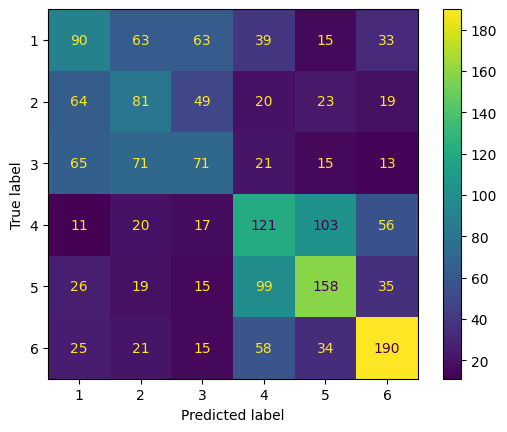

In [11]:
from sklearn.model_selection import train_test_split

# 1. Dividindo a base de treino (X_train_selected, y_train) em treino e validação
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_selected, y_train, test_size=0.25, random_state=42
)

# 2. Verificando as dimensões das bases resultantes
print("Dimensões das bases:")
print(f"X_train_final: {X_train_final.shape}, y_train_final: {y_train_final.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

# Exemplo de visualização rápida das primeiras linhas
print("\nAmostra de X_train_final:\n", X_train_final.head())
print("Amostra de y_train_final:\n", y_train_final.head())

print("\nAmostra de X_val:\n", X_val.head())
print("Amostra de y_val:\n", y_val.head())

# 3. Ajustando o classificador com a nova base de treino (X_train_final, y_train_final)
clf = DecisionTreeClassifier()
clf.fit(X_train_final, y_train_final)

# 4. Fazendo previsões na base de validação
y_val_pred = clf.predict(X_val)

# 5. Exibindo a matriz de confusão para a base de validação
print("\nMatriz de Confusão - Validação:")
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)
plt.show()


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

As 3 variáveis mais importantes são:
               Feature  Importance
0  0_tBodyAcc-mean()-X    0.712110
1  0_tBodyAcc-mean()-Y    0.222871
2  0_tBodyAcc-mean()-Z    0.065019


<ipython-input-12-014ea87e9a61>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_3_features, palette='viridis')


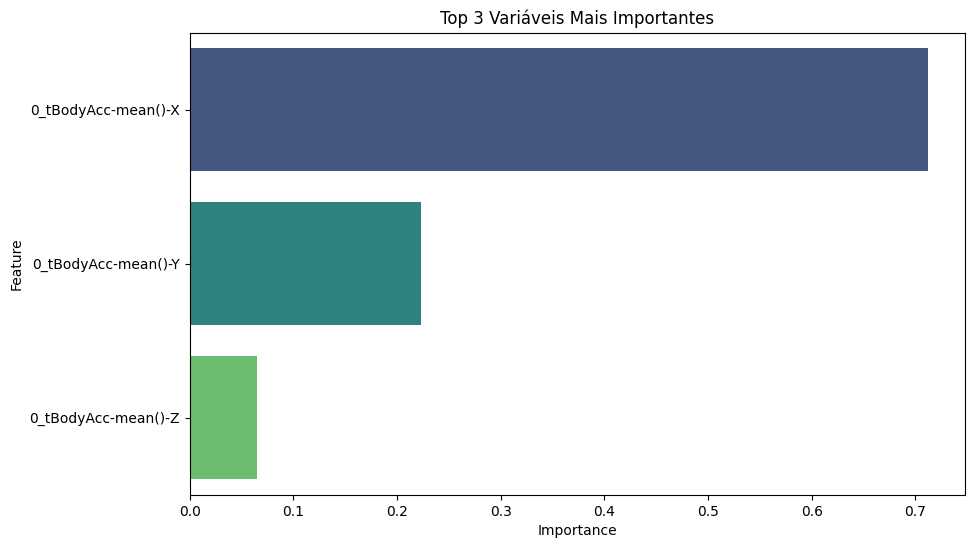


Novas dimensões das bases com as 3 variáveis mais importantes:
X_train_top: (5514, 3), X_val_top: (1838, 3), X_test_top: (2947, 3)


In [12]:
# 1. Treinando a árvore de decisão com profundidade máxima 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_final, y_train_final)

# 2. Coletando a importância das variáveis
importances = clf.feature_importances_

# 3. Criando um DataFrame para visualizar melhor as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Exibindo as 3 variáveis mais importantes
top_3_features = feature_importance_df.head(3)
print("As 3 variáveis mais importantes são:")
print(top_3_features)

# 5. Visualizando a importância das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_3_features, palette='viridis')
plt.title('Top 3 Variáveis Mais Importantes')
plt.show()

# 6. Separando as 3 variáveis mais importantes para o próximo passo
selected_top_features = top_3_features['Feature'].tolist()

# 7. Selecionando essas variáveis na base de treino e teste
X_train_top = X_train_final[selected_top_features]
X_val_top = X_val[selected_top_features]
X_test_top = X_test_selected[selected_top_features]

print("\nNovas dimensões das bases com as 3 variáveis mais importantes:")
print(f"X_train_top: {X_train_top.shape}, X_val_top: {X_val_top.shape}, X_test_top: {X_test_top.shape}")


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

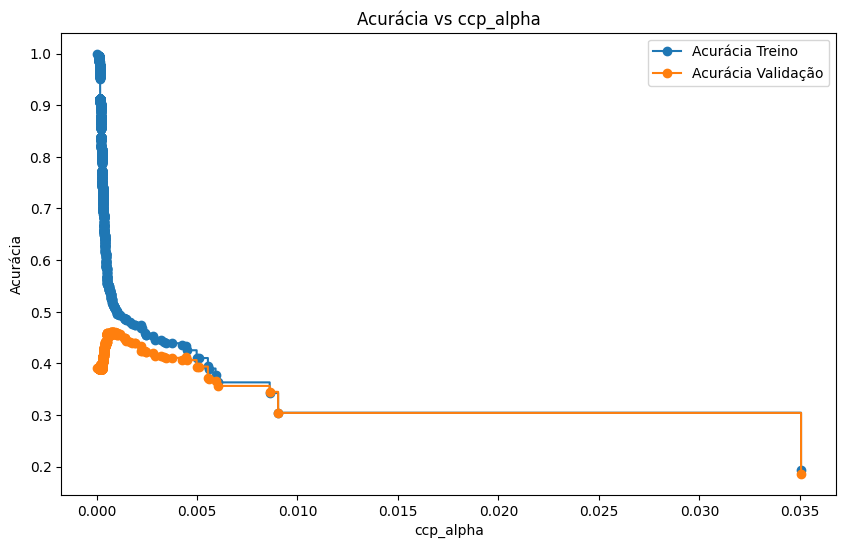

Melhor ccp_alpha encontrado: 0.0008294558994178434
Acurácia na base de teste: 0.4421


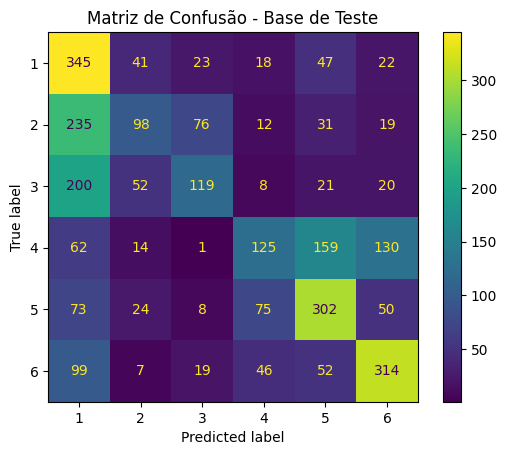

CPU times: user 1min 29s, sys: 781 ms, total: 1min 29s
Wall time: 1min 31s


In [13]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# 1. Definindo as variáveis explicativas e a variável resposta para o treino e validação
X_train_top = X_train_final[selected_top_features]
X_val_top = X_val[selected_top_features]

# 2. Ajustando uma árvore inicial para encontrar os valores de ccp_alpha
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train_top, y_train_final)
ccp_alphas = path.ccp_alphas

# 3. Avaliando diferentes ccp_alphas para otimizar o modelo
models = []
train_scores = []
val_scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train_top, y_train_final)

    # Avaliando o desempenho nas bases de treino e validação
    train_acc = accuracy_score(y_train_final, clf.predict(X_train_top))
    val_acc = accuracy_score(y_val, clf.predict(X_val_top))

    models.append(clf)
    train_scores.append(train_acc)
    val_scores.append(val_acc)

# 4. Plotando os resultados de treino e validação
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Acurácia Treino', drawstyle='steps-post')
plt.plot(ccp_alphas, val_scores, marker='o', label='Acurácia Validação', drawstyle='steps-post')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia vs ccp_alpha')
plt.show()

# 5. Selecionando o melhor modelo com base na maior acurácia de validação
best_alpha = ccp_alphas[np.argmax(val_scores)]
print(f"Melhor ccp_alpha encontrado: {best_alpha}")

# 6. Treinando o modelo final com o melhor ccp_alpha
best_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_clf.fit(X_train_top, y_train_final)

# 7. Avaliando o desempenho na base de teste
y_pred_test = best_clf.predict(X_test_top)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia na base de teste: {test_acc:.4f}")

# 8. Exibindo a matriz de confusão para a base de teste
ConfusionMatrixDisplay.from_estimator(best_clf, X_test_top, y_test)
plt.title('Matriz de Confusão - Base de Teste')
plt.show()



### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia na base de teste: 0.4421

Relatório de Classificação - Base de Teste:
              precision    recall  f1-score   support

           1       0.34      0.70      0.46       496
           2       0.42      0.21      0.28       471
           3       0.48      0.28      0.36       420
           4       0.44      0.25      0.32       491
           5       0.49      0.57      0.53       532
           6       0.57      0.58      0.58       537

    accuracy                           0.44      2947
   macro avg       0.46      0.43      0.42      2947
weighted avg       0.46      0.44      0.43      2947



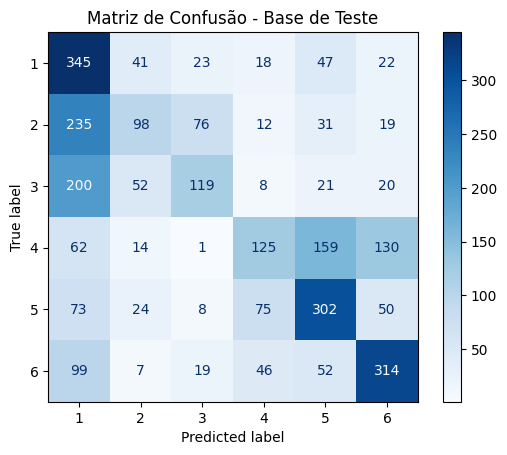

In [14]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1. Previsão na base de teste
y_pred_test = best_clf.predict(X_test_top)

# 2. Calculando a acurácia na base de teste
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Acurácia na base de teste: {test_accuracy:.4f}")

# 3. Relatório de classificação (Precision, Recall e F1-Score)
print("\nRelatório de Classificação - Base de Teste:")
print(classification_report(y_test, y_pred_test))

# 4. Exibindo a matriz de confusão para a base de teste
ConfusionMatrixDisplay.from_estimator(best_clf, X_test_top, y_test, cmap='Blues')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()


# **Relatório Consolidado de Análise de Atividade Humana com Smartphones**  

## **Introdução**  
Este relatório apresenta uma análise detalhada sobre a **classificação de atividades humanas** utilizando dados de sensores de smartphones, como acelerômetros e giroscópios. O objetivo é identificar seis atividades comuns: **andando, subindo escadas, descendo escadas, parado, sentado e deitado**. A análise envolveu a construção de modelos de **árvore de decisão**, com foco em melhorar a acurácia e entender os desafios na generalização do modelo.

---

## **Dados Utilizados**  
- **Coleta**: Sensores com frequência de 50 Hz, agregados em medições a cada 0,3 segundos.  
- **Total de Variáveis**: 561, incluindo medidas como:
  - Aceleração mínima, máxima e média nos eixos **X, Y e Z**.
  - Padrões derivados de giroscópios e sensores de movimento.

---

## **Resultados e Avaliação do Modelo**  
### **Desempenho**  
Os modelos de árvore de decisão apresentaram as seguintes acurácias:  
- **Acurácia no Treinamento**: **56.39%**  
- **Acurácia no Teste**: **44.08%**  
- **Modelo com 3 variáveis principais**:  
  - Acurácia na base de teste: **44.21%**

### **Matriz de Confusão (Resumo)**  
- **Melhor performance**: Atividades **5 (sentado)** e **6 (deitado)** tiveram recall e precision superiores.  
- **Classes com maior confusão**: **Atividades 2 (subindo escadas)** e **3 (descendo escadas)** foram frequentemente confundidas, indicando padrões semelhantes capturados pelos sensores.

### **Sobreajuste (Overfitting)**  
- **Diferença entre treino e teste**: A acurácia mais alta no conjunto de treinamento indica um **potencial sobreajuste**, ou seja, o modelo se adapta bem aos dados de treino, mas não generaliza adequadamente para novos dados.  
- **ccp_alpha**: O valor de **0.00083** foi utilizado para reduzir a complexidade da árvore, mas o desempenho ainda foi limitado.

---

## **Insights e Recomendações**  
1. **Exploração de Variáveis**  
   - **Variáveis Principais**: As variáveis mais relevantes foram:
     - **0_tBodyAcc-mean()-X**: 71.2% de importância  
     - **0_tBodyAcc-mean()-Y**: 22.3% de importância  
     - **0_tBodyAcc-mean()-Z**: 6.5% de importância  
   - **Insight**: A maior relevância da aceleração no eixo X sugere que o comportamento nesse eixo tem maior impacto na classificação das atividades.

2. **Limitações do Modelo**  
   - **Confusão entre classes**: Atividades com padrões de movimento parecidos, como subir e descer escadas, apresentaram maior taxa de erros.
   - **Ajuste Limitado**: Mesmo após otimização, a acurácia de **44%** ainda é insuficiente para aplicações críticas.

3. **Sugestões para Melhorias**
   - **Validação Cruzada**: Implementar **validação cruzada** para garantir que o modelo tenha desempenho consistente em diferentes subconjuntos dos dados.
   - **Aumento de Complexidade**: Explorar **modelos alternativos** como **Random Forests ou XGBoost**, que podem lidar melhor com a alta dimensionalidade e padrões não lineares.
   - **Feature Engineering**: Criar **novas variáveis derivadas** (como aceleração relativa entre eixos ou variância) para capturar mais informações relevantes.
   - **Técnicas de Balanceamento**: Se necessário, utilizar **oversampling** em classes com menos amostras para melhorar a previsão de atividades menos frequentes.

---

## **Conclusão**  
Os dados de sensores de smartphones apresentam um grande potencial para a identificação precisa de atividades humanas. No entanto, os resultados atuais indicam que há espaço para aprimoramento. O **desempenho limitado e o sobreajuste** sugerem que o modelo pode ser melhorado com técnicas avançadas de machine learning e maior exploração de variáveis. A aplicação bem-sucedida dessa tecnologia pode ter impactos importantes em áreas como **saúde e monitoramento de atividades diárias**.
